# 去除试卷的黑框

In [16]:
import glob
import cv2
import copy
import matplotlib.pyplot as plt

%matplotlib inline

## Example #1

In [3]:
def demo1(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
    binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = img[y:y+h, x:x+w]
    return crop

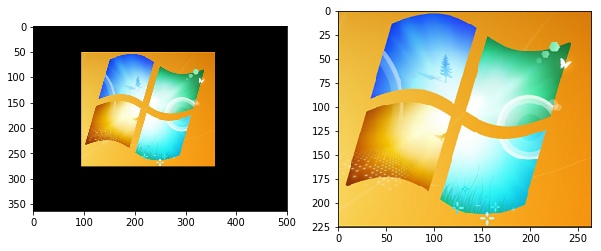

In [11]:
img = cv2.imread(r'E:/C_map/CS-Box/OPENCV/black/windows.png')
crop = demo1(img)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(img)
ax2.imshow(crop)

**findContours**

`findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy`

在binary image 寻找轮廓

In [21]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
   

In [22]:
original = cv2.imread('./black/0.png')
img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# use binary threshold, all pixel that are beyond 3 are made white
_, thresh_original = cv2.threshold(img, 3, 255, cv2.THRESH_BINARY)

# Now find contours in it.
thresh = copy.copy(thresh_original)
_, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [27]:
print(type(contours))
print(type(hierarchy))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
# get contours with highest height
lst_contours = []
for cnt in contours:
    ctr = cv2.boundingRect(cnt)
    lst_contours.append(ctr)
x,y,w,h = sorted(lst_contours, key=lambda coef: coef[3])[-1]


# draw contours
ctr = copy.copy(original)
cv2.rectangle(ctr, (x,y),(x+w,y+h),(0,255,0),2)


# display results with matplotlib

# original
original = original[:,:,::-1] # flip color for maptolib display
plt.subplot(221), plt.imshow(original)
plt.title('Original Image'), plt.xticks([]),plt.yticks([])

# Threshold
plt.subplot(222), plt.imshow(thresh_original, cmap='gray')
plt.title('threshold binary'), plt.xticks([]),plt.yticks([])

# selected area for future crop
ctr = ctr[:,:,::-1] # flip color for maptolib display
plt.subplot(223), plt.imshow(ctr)
plt.title('Selected area'), plt.xticks([]),plt.yticks([])

plt.show()